In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from sklearn.preprocessing import MinMaxScaler

#Regressoors
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge , Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, AdaBoostRegressor 
from xgboost import XGBRegressor

#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#PCA
from sklearn.decomposition import RandomizedPCA, PCA
#MDS
from sklearn.manifold import MDS
#SNE
from sklearn.manifold import TSNE

#Train Test Split
from sklearn.cross_validation import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score

import statsmodels.api as sm
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from ipywidgets import interact, interact_manual

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
Apple_acid_spectra = pd.read_csv('20190311.txt', sep=' ')
Apple_acid_spectra.drop(['Unnamed: 144', 'Channel', 'Wavelength(nm)', 'Current', 'BackGround'], axis=1, inplace=True)
Apple_acid_spectra = Apple_acid_spectra.T
Apple_acid_spectra = Apple_acid_spectra.iloc[:,:1024]

Wine_acid_spectra = pd.read_csv('20190312.txt', sep=' ')
Wine_acid_spectra.drop(['Unnamed: 164','Channel', 'Wavelength(nm)', 'Current', 'BackGround'], axis=1, inplace=True)
Wine_acid_spectra = Wine_acid_spectra.T
Wine_acid_spectra = Wine_acid_spectra.iloc[:,:1024]

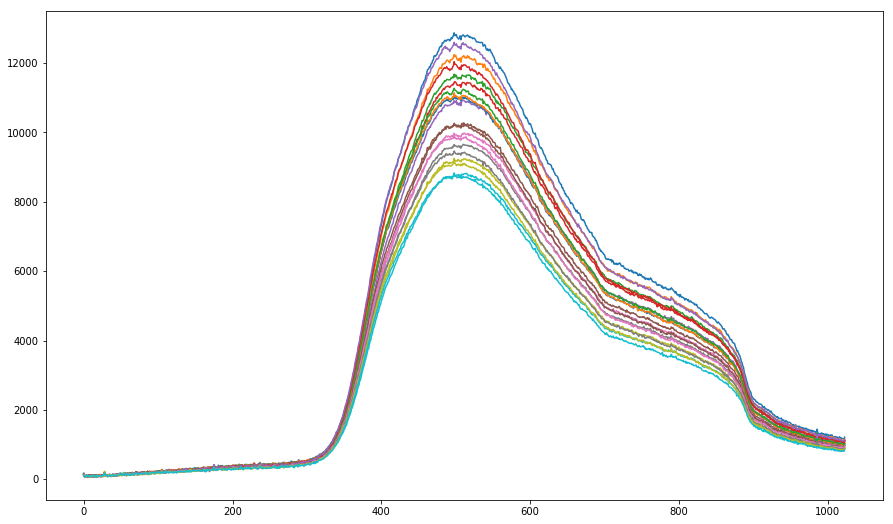

In [20]:
plt.figure(figsize=(15,9))
for i in range(20,40):
    plt.plot(range(Wine_acid_spectra.shape[1]) , Wine_acid_spectra.iloc[i,:].values)

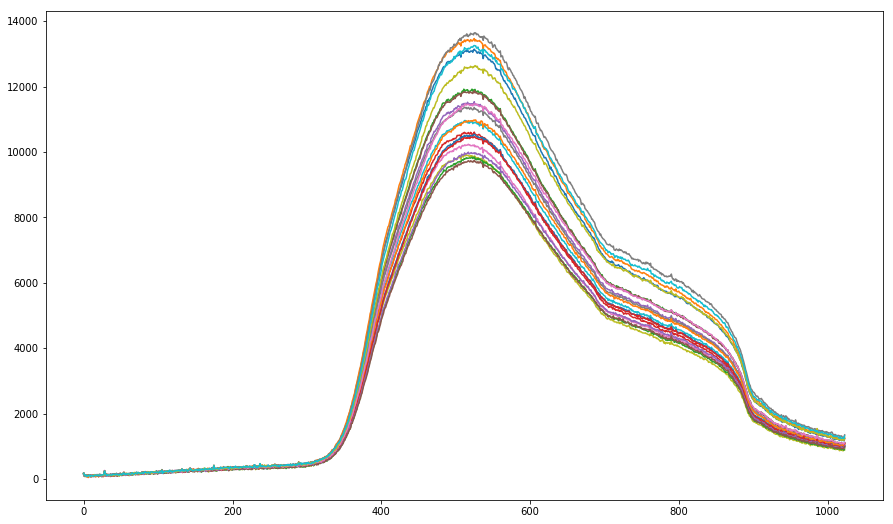

In [21]:
plt.figure(figsize=(15,9))
for i in range(20,40):
    plt.plot(range(Apple_acid_spectra.shape[1]) , Apple_acid_spectra.iloc[i,:].values)

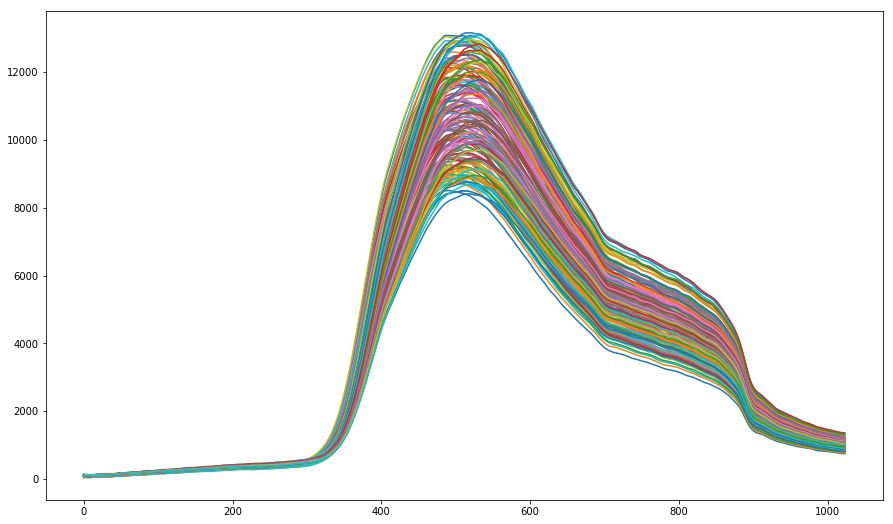

In [24]:
lowess_Wine_spectra = list()
plt.figure(figsize=(15,9))
for i in range(Wine_acid_spectra.shape[0]) :
    x = range(Wine_acid_spectra.shape[1])
    y = Wine_acid_spectra.iloc[i].values
    lowess = sm.nonparametric.lowess(y, x, frac=0.015)
    plt.plot(lowess[:,0], lowess[:,1])
    lowess_Wine_spectra.append(lowess[:,1])

lowess_Wine_spectra_DF = pd.DataFrame(np.array(lowess_Wine_spectra))

In [25]:
scaler = MinMaxScaler()
scaler.fit(lowess_Wine_spectra_DF.T)
lowess_Wine_spectra_DF = pd.DataFrame(scaler.transform(lowess_Wine_spectra_DF.T)).T

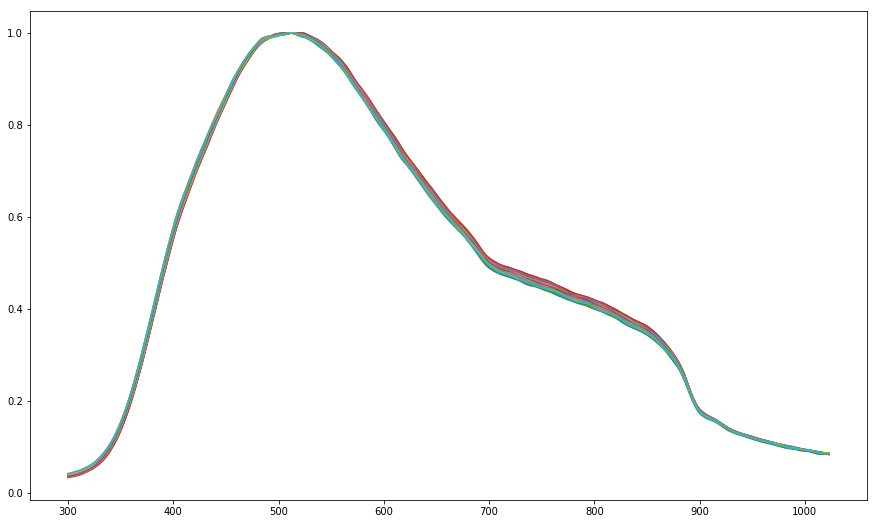

In [26]:
plt.figure(figsize=(15,9))
for i in range(30):
    plt.plot(range(300,1024) ,lowess_Wine_spectra_DF.iloc[i,300:].values)

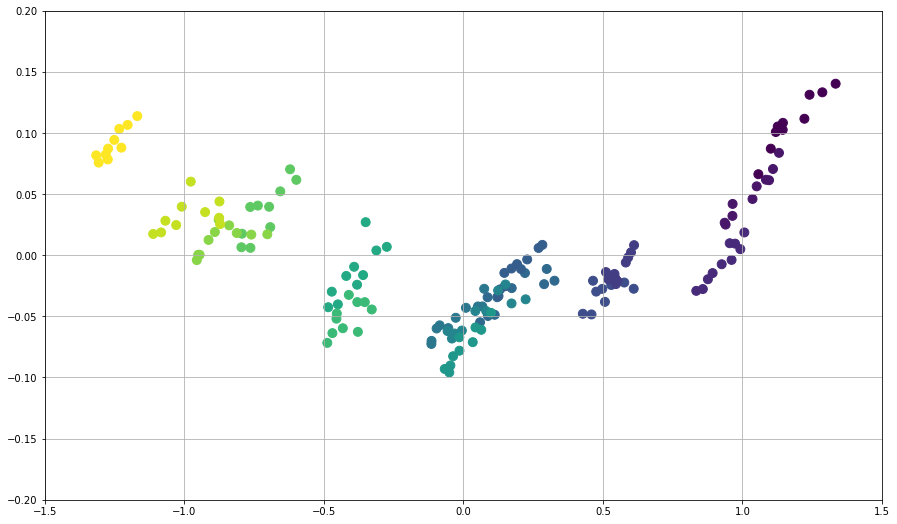

In [27]:
pH = np.array([3.51]*10+[3.47]*10+[3.44]*10+[3.40]*10+[3.36]*10+[3.32]*10+[3.28]*10+[3.24]*10+[3.55]*10+[3.60]*10+[3.65]*10+[3.70]*10+[3.75]*10+[3.80]*10+[3.86]*10+[3.92]*10)

pca_model = PCA(n_components=3)
pca_Wine_acid_data = pd.DataFrame(pca_model.fit_transform(lowess_Wine_spectra_DF))
pca_Wine_acid_data['pH'] = pH

plt.figure(figsize=(15,9))
plt.scatter(pca_Wine_acid_data.iloc[:,0], pca_Wine_acid_data.iloc[:,1], c=pca_Wine_acid_data.pH.values[:], s=80)
plt.xlim(-1.5,1.5)
plt.ylim(-0.2,0.2)
plt.grid()

In [34]:
Old_Wines_DF = pd.read_csv('wine_measurements_06_10_17.txt', sep=' ').T
Old_Wines_DF.drop(['Unnamed: 114', 'Channel', 'Wavelength(nm)', 'Current', 'BackGround'], axis=0, inplace=True)

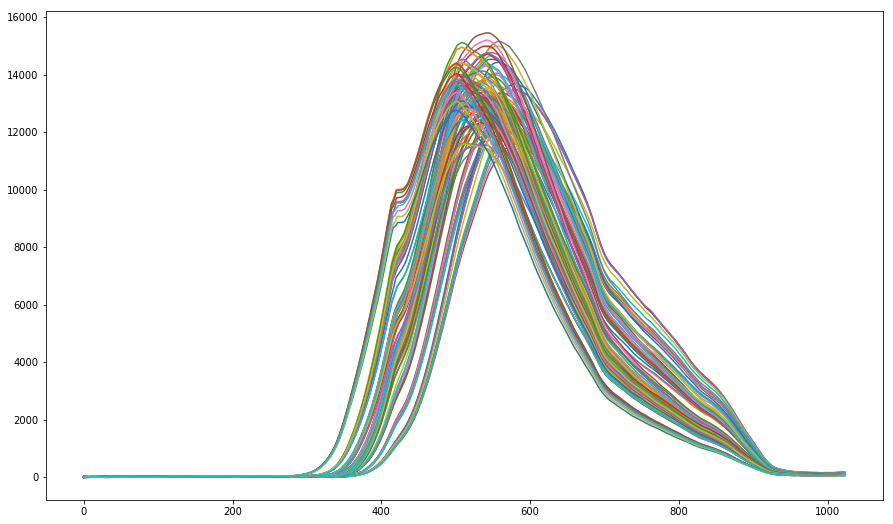

In [43]:
data_lowess_1 = list()
plt.figure(figsize=(15,9))
for i in range(Old_Wines_DF.shape[0]) :
    x = range(1024)
    y = Old_Wines_DF.iloc[i].values
    lowess = sm.nonparametric.lowess(y, x, frac=0.015)
    plt.plot(lowess[:,0], lowess[:,1])
    data_lowess_1.append(lowess[:,1])

lowess_df = pd.DataFrame(np.array(data_lowess_1))

In [44]:
scaler = MinMaxScaler()
#for i in range(lowess_df.shape[0]):
scaler.fit(lowess_df.iloc[:,:-1].T)
lowess_df = pd.DataFrame(scaler.transform(lowess_df.T)).T

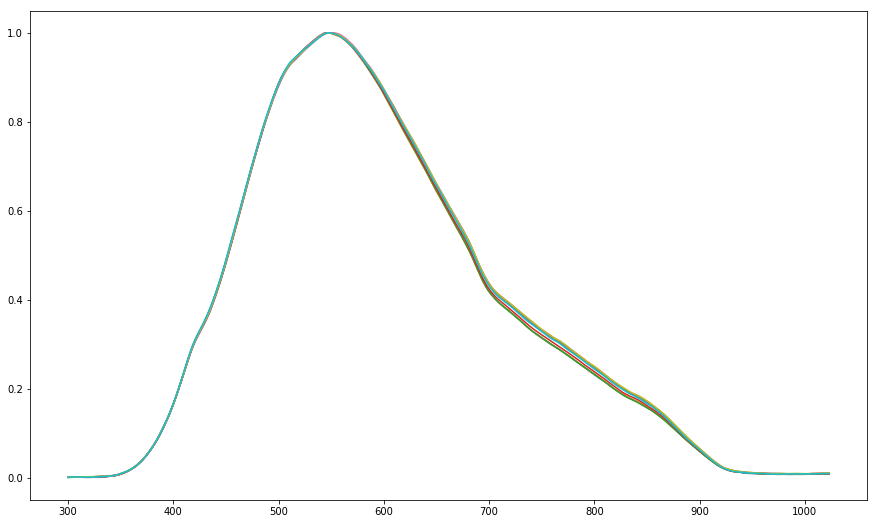

In [46]:
plt.figure(figsize=(15,9))
for i in range(30,40):
    plt.plot(range(300,1024) ,lowess_df.iloc[i,300:].values)

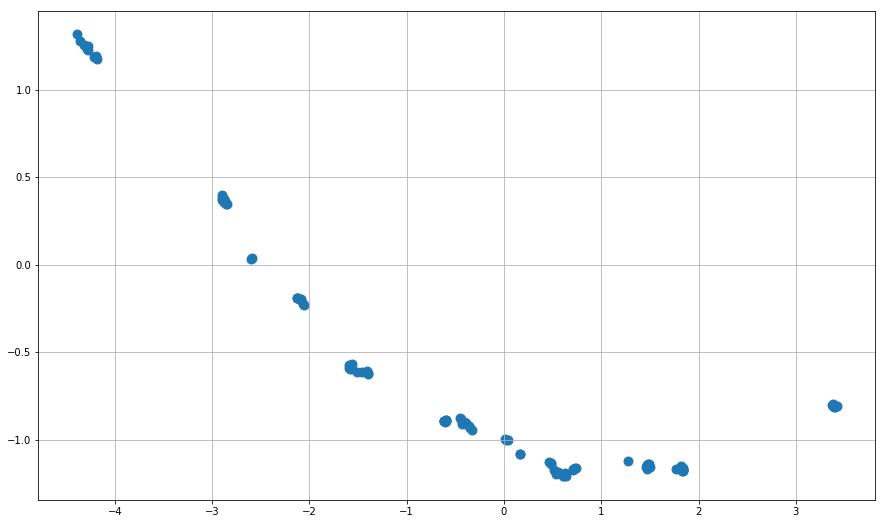

In [50]:
pca_Old_Wines_data = pd.DataFrame(pca_model.transform(lowess_df))

plt.figure(figsize=(15,9))
plt.scatter(pca_Old_Wines_data.iloc[:,0], pca_Old_Wines_data.iloc[:,1], s=80)
#plt.xlim(-1.5,1.5)
#plt.ylim(-0.2,0.2)
plt.grid()

In [58]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(pca_Wine_acid_data.iloc[:,:-1].T)
pca_Wine_acid_data = pd.DataFrame(scaler.transform(pca_Wine_acid_data.T)).T
pca_Wine_acid_data['pH'] = pH

In [59]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(pca_Old_Wines_data.iloc[:,:-1].T)
pca_Old_Wines_data = pd.DataFrame(scaler.transform(pca_Old_Wines_data.T)).T

In [60]:
wine_regressors = []
wine_scores = []

# Looking for best Wine regressor
for RS in range(100):
    train_data, test_data, train_target, test_target = train_test_split(pca_Wine_acid_data.iloc[:,:3].values,
                                                                        pca_Wine_acid_data.pH.values,
                                                                   test_size=0.3, random_state=RS)
    Regressor = LinearRegression() #GradientBoostingRegressor(learning_rate=0.07) #LinearRegression()
    Regressor.fit(train_data, train_target)
    Preds = Regressor.predict(test_data)
    wine_scores.append(np.sqrt(MSE(test_target, Preds)))
    wine_regressors.append(Regressor)
    
wine_scores = np.array(wine_scores)
Wine_Regressor = wine_regressors[wine_scores.argmax()]

In [61]:
Wine_Regressor.predict(pca_Old_Wines_data)

array([ 4.26250218,  4.2716876 ,  4.27074274,  4.26533975,  4.26844555,
        4.27561735,  4.28334652,  4.2810411 ,  4.2735022 ,  4.27450069,
        4.69919892,  4.69307713,  4.36136328,  4.35708516,  4.39074288,
        4.36391976,  4.32162333,  4.3227551 ,  4.31076376,  4.31346651,
        4.02634312,  4.02664886,  4.03023844,  4.01731123,  4.01557987,
        4.01631048,  4.01557087,  4.00810941,  4.01185937,  4.00208142,
        5.76447048,  5.7400942 ,  5.79213804,  5.58546342,  5.28352448,
        5.29516352,  5.27164381,  5.32686105,  5.23516477,  5.4574672 ,
        4.36258089,  4.6238501 ,  4.62725967,  4.65247407,  4.65505395,
        4.63239251,  4.63991507,  4.35999754,  4.67061614,  4.684116  ,
        6.47838257,  6.76630209,  6.74983232,  6.42705975,  6.19970582,
        7.02011941,  6.95617038,  7.07993128,  7.36241043,  7.54646756,
        3.99048567,  3.88914591,  3.88404326,  3.88730316,  3.88345442,
        3.88270947,  3.88425001,  3.88273953,  3.890597  ,  3.89